In [27]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv('/Users/dnandi/Documents/Tools FY24 Jira/Intuit JIRA 2023-10-18T14_39_00-0700.csv')
octResolvedIssues = pd.read_csv('/Users/dnandi/Documents/Tools FY24 Jira/FY24 Issues resolved October.csv')

In [3]:
df.head(21)

,Issue key,Issue id,Summary,Updated,Assignee,Created,Custom field (Epic Name),Resolution,Custom field (Completed Story Points),Custom field (Total Story Points)
0,ATETOOLS-831,7756526,Workstation Setup - Do it for Me,16/Aug/23 12:07 PM,tjohnson1,16/Aug/23 12:06 PM,Workstation Setup,NaN,0.0,1.0
1,ATETOOLS-748,7579792,Stories for publishing ATE Tax Content artifac...,18/Sep/23 6:21 PM,tjohnson1,27/Jun/23 6:05 AM,WU: Publish,NaN,14.0,20.0
2,ATETOOLS-841,7772817,"Stories that cover the MAPCD UI, Service and DB",18/Oct/23 9:07 AM,tjohnson1,22/Aug/23 12:02 PM,WU: MAPCD,NaN,25.0,29.0
3,ATETOOLS-838,7771551,"Web Updates: Installer for Web Updates, OnDemand",18/Oct/23 8:49 AM,tjohnson1,22/Aug/23 7:45 AM,WU: Installer,NaN,0.0,2.0
4,CSRM-86,7414509,Upgrade the database from MySQL to PostgreSQL,29/Aug/23 7:39 AM,tjohnson1,23/May/23 5:05 AM,Tier 2 DB,NaN,11.0,18.0
5,ATETOOLS-186,6375645,Tech Debt: FY23 - High Priority issues with at...,01/Aug/23 6:05 AM,tjohnson1,11/May/22 9:08 AM,Tech Debt: FY23,NaN,20.0,20.0
6,ATETOOLS-631,7218442,Stories for Detail conversion and DB2Detail.,14/Aug/23 1:35 PM,tjohnson1,23/Mar/23 2:36 PM,TY23 Client Detail,NaN,19.0,19.0
7,ATETOOLS-346,6588111,Support: FY-23,03/Oct/23 12:28 PM,tjohnson1,02/Aug/22 2:36 PM,Support: FY-23,NaN,154.0,163.0
8,CSRM-72,6479332,Support CSRM: FY23,26/Sep/23 9:17 AM,tjohnson1,27/Jun/22 11:57 AM,Support CSRM: FY23,NaN,11.0,15.0
9,ATETOOLS-803,7706967,Epic for capturing RTB for ATETOOLS,04/Oct/23 2:09 PM,tjohnson1,01/Aug/23 6:16 AM,RTB: FY24,NaN,14.0,25.0


In [55]:
df.shape

(21, 10)

In [7]:
df.rename(columns = {'Custom field (Epic Name)':'Epic Name'}, inplace =True )
df.rename(columns = {'Custom field (Completed Story Points)':'Completed Story Points'}, inplace =True )
df.rename(columns = {'Custom field (Total Story Points)':'Total Story Points'}, inplace =True )

df.info()
df['Percentage Complete'] = 100 - round((((df['Total Story Points'] - df['Completed Story Points'])/ df['Total Story Points'])*100), 2)
df.info()
df.head(21)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Issue key               21 non-null     object 
 1   Issue id                21 non-null     int64  
 2   Summary                 21 non-null     object 
 3   Updated                 21 non-null     object 
 4   Assignee                20 non-null     object 
 5   Created                 21 non-null     object 
 6   Epic Name               21 non-null     object 
 7   Resolution              0 non-null      float64
 8   Completed Story Points  21 non-null     float64
 9   Total Story Points      21 non-null     float64
 10  Percentage Complete     21 non-null     float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column                  Non-Null Count

,Issue key,Issue id,Summary,Updated,Assignee,Created,Epic Name,Resolution,Completed Story Points,Total Story Points,Percentage Complete
0,ATETOOLS-831,7756526,Workstation Setup - Do it for Me,16/Aug/23 12:07 PM,tjohnson1,16/Aug/23 12:06 PM,Workstation Setup,NaN,0.0,1.0,0.00
1,ATETOOLS-748,7579792,Stories for publishing ATE Tax Content artifac...,18/Sep/23 6:21 PM,tjohnson1,27/Jun/23 6:05 AM,WU: Publish,NaN,14.0,20.0,70.00
2,ATETOOLS-841,7772817,"Stories that cover the MAPCD UI, Service and DB",18/Oct/23 9:07 AM,tjohnson1,22/Aug/23 12:02 PM,WU: MAPCD,NaN,25.0,29.0,86.21
3,ATETOOLS-838,7771551,"Web Updates: Installer for Web Updates, OnDemand",18/Oct/23 8:49 AM,tjohnson1,22/Aug/23 7:45 AM,WU: Installer,NaN,0.0,2.0,0.00
4,CSRM-86,7414509,Upgrade the database from MySQL to PostgreSQL,29/Aug/23 7:39 AM,tjohnson1,23/May/23 5:05 AM,Tier 2 DB,NaN,11.0,18.0,61.11
5,ATETOOLS-186,6375645,Tech Debt: FY23 - High Priority issues with at...,01/Aug/23 6:05 AM,tjohnson1,11/May/22 9:08 AM,Tech Debt: FY23,NaN,20.0,20.0,100.00
6,ATETOOLS-631,7218442,Stories for Detail conversion and DB2Detail.,14/Aug/23 1:35 PM,tjohnson1,23/Mar/23 2:36 PM,TY23 Client Detail,NaN,19.0,19.0,100.00
7,ATETOOLS-346,6588111,Support: FY-23,03/Oct/23 12:28 PM,tjohnson1,02/Aug/22 2:36 PM,Support: FY-23,NaN,154.0,163.0,94.48
8,CSRM-72,6479332,Support CSRM: FY23,26/Sep/23 9:17 AM,tjohnson1,27/Jun/22 11:57 AM,Support CSRM: FY23,NaN,11.0,15.0,73.33
9,ATETOOLS-803,7706967,Epic for capturing RTB for ATETOOLS,04/Oct/23 2:09 PM,tjohnson1,01/Aug/23 6:16 AM,RTB: FY24,NaN,14.0,25.0,56.00


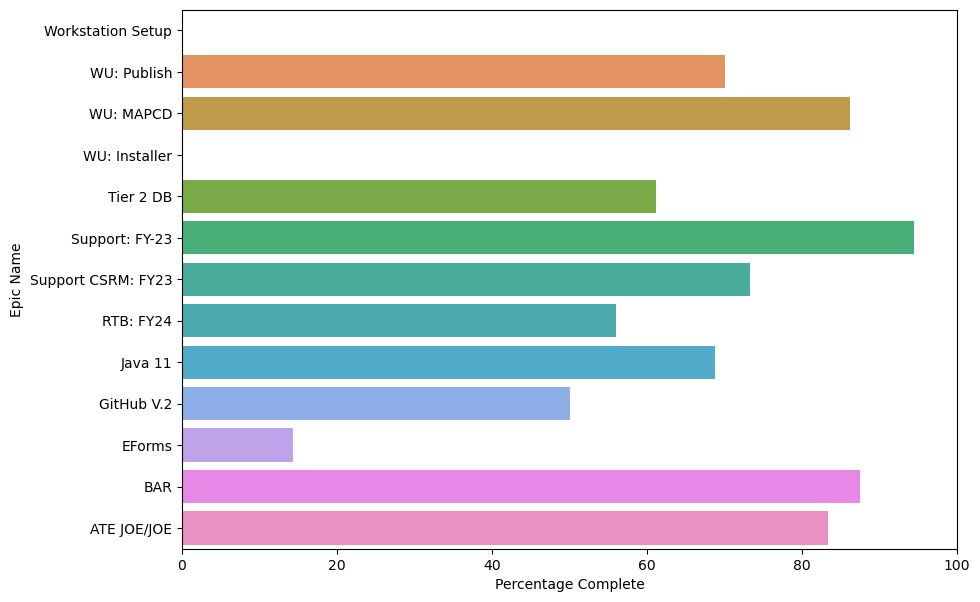

In [9]:
df_not_completed = df[df['Percentage Complete'] < 100]

df_not_completed.head()
plt.figure(figsize=(10,7))
plt.xticks(rotation=0)
plt.xlim(0,100)

sns.barplot(y='Epic Name', x='Percentage Complete', data=df_not_completed);

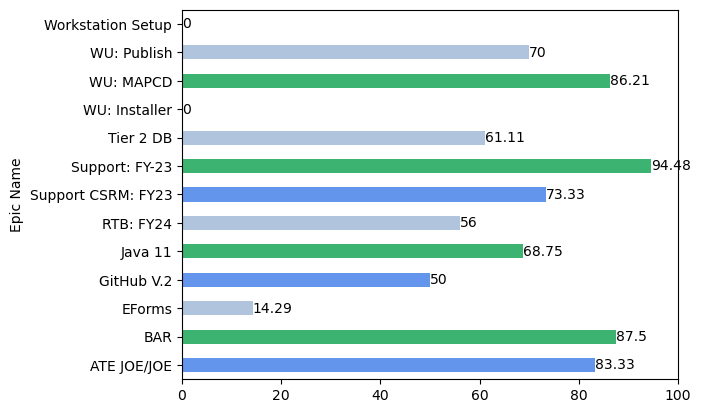

In [26]:

profit_color = [('#485B00' if p > 80 else '#FF4040') for p in df_not_completed['Percentage Complete']]
test_color = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
intuit_color=['cornflowerblue','lightsteelblue','mediumseagreen']

ax = df_not_completed.plot.barh(y='Percentage Complete', x='Epic Name', legend=False, color=intuit_color)
ax.invert_yaxis()
ax.set_xlim(0,100)
ax.bar_label(ax.containers[0]);

In [ ]:
ax = sns.barplot(y='Epic Name', x='Percentage Complete', data=df_not_completed)

for x,y,s in df_not_completed(x):
    ax.text(0.5,0.5, df_not_completed[row.value]['Percentage Complete'],
            color='black', ha='center')

In [28]:
octResolvedIssues.head(5)

,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project description,...,Custom field (Watcher).2,Custom field (Watcher).3,Custom field (Watcher).4,Custom field (Watcher).5,Custom field (Work Category),Custom field (Workaround),Custom field (gitCommitsReferenced),Comment,Comment.1,Comment.2
0,Lacerte COR US Print Regression Issue,ATETOOLS-881,7795030,Story,Released,ATETOOLS,ACE: ATE Content Engineering Support,software,tjohnson1,ACE is the team that provides ATE & ATE Conten...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023 COR AL EF Regressions not updating,ATETOOLS-932,8010953,Story,Closed,ATETOOLS,ACE: ATE Content Engineering Support,software,tjohnson1,ACE is the team that provides ATE & ATE Conten...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11/Oct/23 9:23 AM;sshrivastava1;Upon looking a...,NaN,NaN
2,GitHub Organizational Rights - New TAP Hire,ATETOOLS-757,7629104,Story,Closed,ATETOOLS,ACE: ATE Content Engineering Support,software,tjohnson1,ACE is the team that provides ATE & ATE Conten...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Implement ""build"" scenario and dashboard tile",ATETOOLS-736,7514562,Story,Released,ATETOOLS,ACE: ATE Content Engineering Support,software,tjohnson1,ACE is the team that provides ATE & ATE Conten...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ITE: SCM errors are logged in Telemetry,ATETOOLS-565,7069917,Story,Released,ATETOOLS,ACE: ATE Content Engineering Support,software,tjohnson1,ACE is the team that provides ATE & ATE Conten...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
octResolvedIssues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Columns: 229 entries, Summary to Comment.2
dtypes: float64(119), int64(4), object(106)
memory usage: 259.5+ KB


In [ ]:

octResolvedIssues.rename(columns = {'Custom field (Epic Name)':'Epic Name'}, inplace =True )
octResolvedIssues.rename(columns = {'Custom field (Completed Story Points)':'Completed Story Points'}, inplace =True )
octResolvedIssues.rename(columns = {'Custom field (Total Story Points)':'Total Story Points'}, inplace =True )
octResolvedIssues.drop(columns = {'Custom field (Watcher).2', 'Custom field (Watcher).3','Custom field (Watcher).4','Custom field (Watcher).5'}, inplace=True)
octResolvedIssues.drop(columns = {'Custom field (Watcher)', 'Custom field (Watcher).1','Custom field (Work Category)','Custom field (Workaround)'}, inplace=True)


In [47]:
octResolvedIssues.drop(columns = {'Comment', 'Comment.1','Comment.2'}, inplace=True)

octResolvedIssues.head(2)

,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project description,...,Custom field (Test Case ID),Custom field (Test Sessions),Custom field (Test Type),Custom field (Testing Status),Total Story Points,Custom field (URL),Custom field (Vendor),Custom field (Verified in Build),Custom field (Verifier),Custom field (gitCommitsReferenced)
0,Lacerte COR US Print Regression Issue,ATETOOLS-881,7795030,Story,Released,ATETOOLS,ACE: ATE Content Engineering Support,software,tjohnson1,ACE is the team that provides ATE & ATE Conten...,...,NaN,NaN,NaN,Not started,NaN,NaN,NaN,NaN,NaN,NaN
1,2023 COR AL EF Regressions not updating,ATETOOLS-932,8010953,Story,Closed,ATETOOLS,ACE: ATE Content Engineering Support,software,tjohnson1,ACE is the team that provides ATE & ATE Conten...,...,NaN,NaN,NaN,Not started,NaN,NaN,NaN,NaN,NaN,NaN


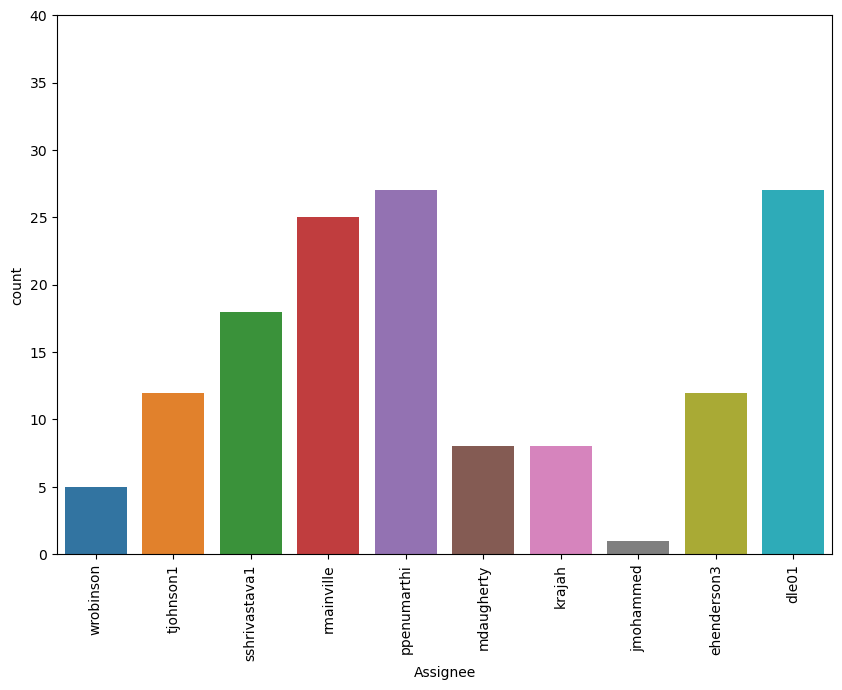

In [57]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
plt.ylim(0,40)
sns.countplot(x='Assignee', data=octResolvedIssues);


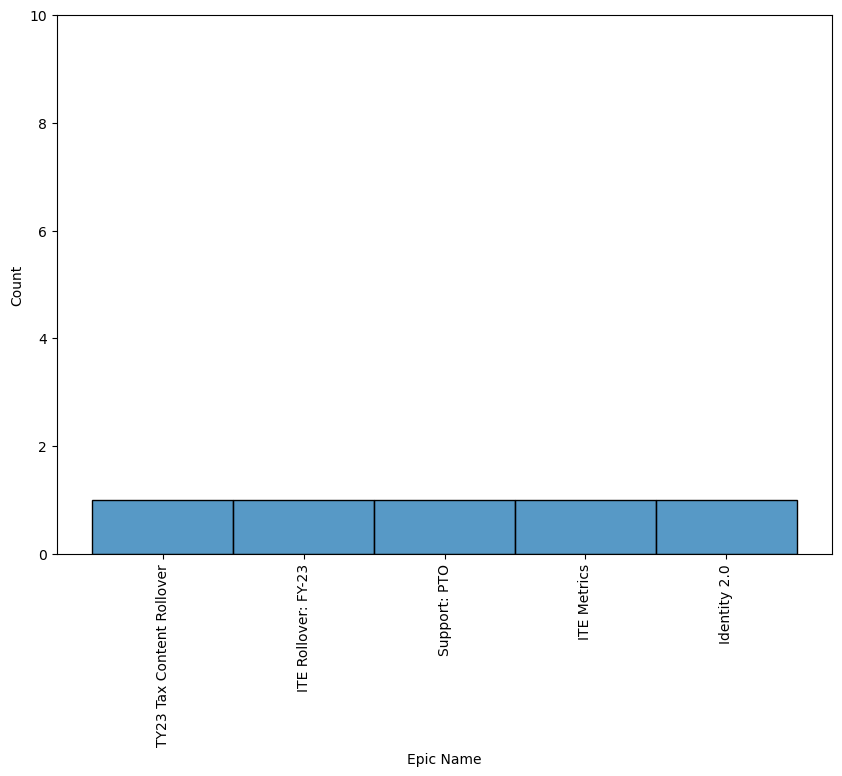

In [58]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
plt.ylim(0,10)
sns.histplot(x='Epic Name',data=octResolvedIssues);

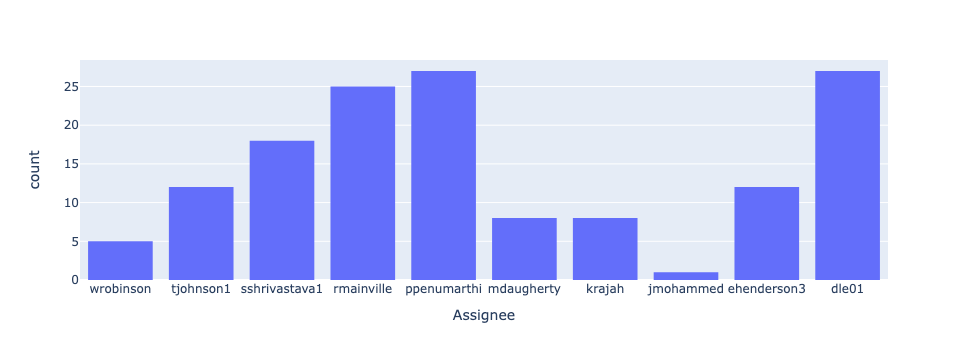

In [63]:
import plotly.express as px
assignee_plot = px.histogram(octResolvedIssues, x='Assignee')
assignee_plot.show()

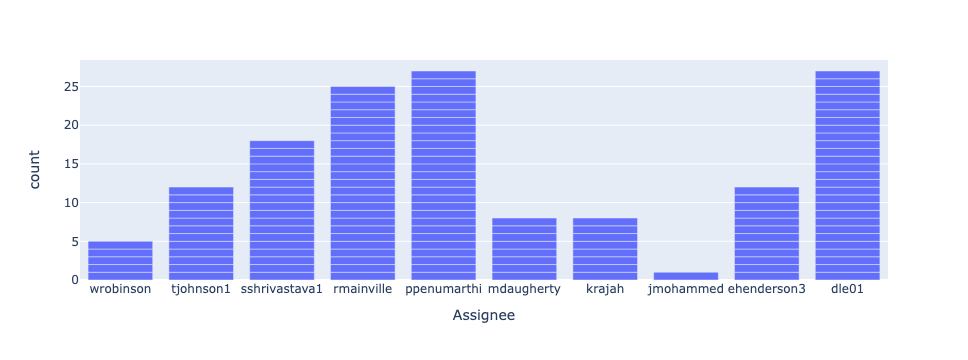

In [67]:
assignee_plot = px.bar(octResolvedIssues, x='Assignee')
assignee_plot.show()